# Pós-Graduação - Ciência de Dados & Big Data

## Pontifícia Universidade Católica de Minas Gerais (PUC-MG)

### Aluno: Victor Hugo Negrisoli

### Modelos Estatísticos - Correlação, Regressão Linear Simples e Múltipla

#### Importando as bibliotecas necessárias

In [145]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from IPython.display import Image

#### Função para configurar os plots da Matplotlib

In [35]:
def configurar_plot(titulo, x, y):
    plt.title(titulo)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.gcf().set_size_inches(16, 8)
    plt.show()

#### Importando e transformando os dados

In [16]:
dados = pd.read_csv('dados/06 - correl_ex1.csv', encoding='ansi')

In [17]:
dados.head()

,Semana,Nº de comerciais,Volume de vendas (100 reais)
0,1,2,50
1,2,5,57
2,3,1,41
3,4,3,54
4,5,4,54


In [26]:
dados = dados.rename(columns = {
    'Semana': 'semana',
    'Nº de comerciais': 'qtd_comerciais', 
    'Volume de vendas (100 reais)': 'vol_vendas'
})

dados

,semana,qtd_comerciais,vol_vendas
0,1,2,50
1,2,5,57
2,3,1,41
3,4,3,54
4,5,4,54
5,6,1,38
6,7,5,63
7,8,3,48
8,9,4,59
9,10,2,46


#### Rápida análise exploratória sobre os dados

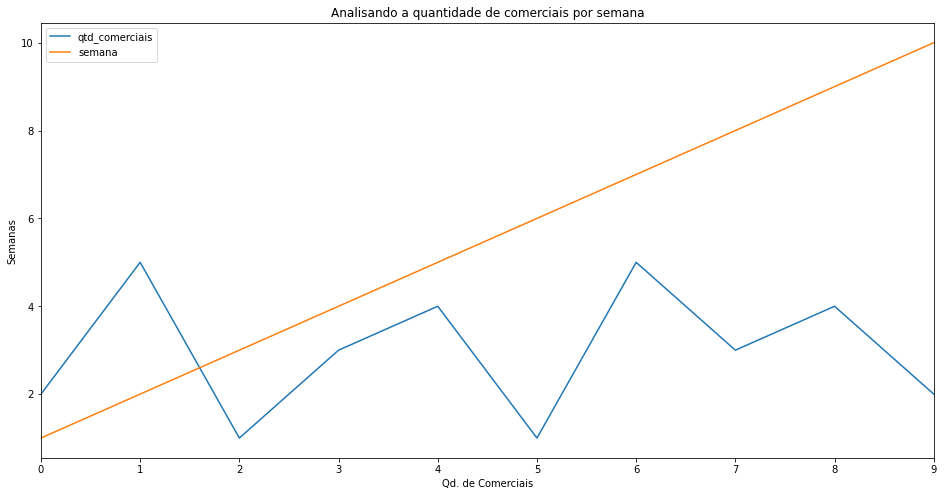

In [41]:
dados[['qtd_comerciais', 'semana']].plot(kind='line')
configurar_plot('Analisando a quantidade de comerciais por semana', 'Qd. de Comerciais', "Semanas")

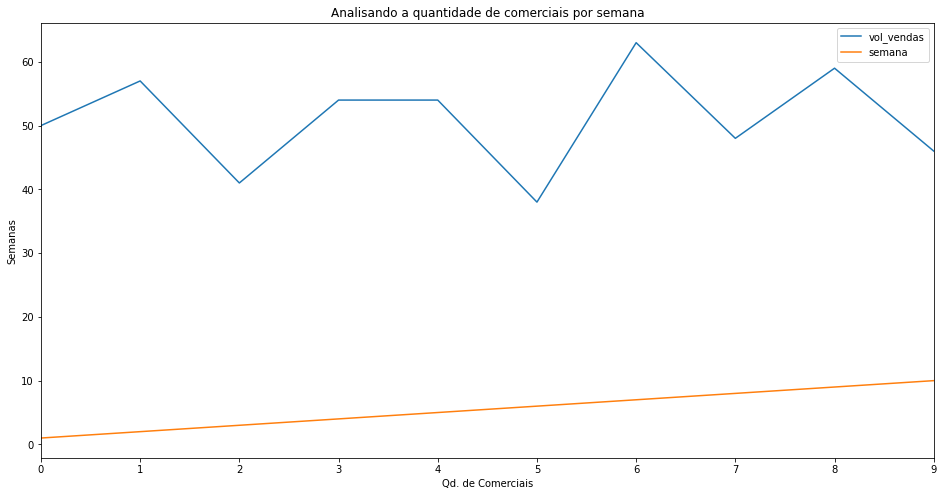

In [42]:
dados[['vol_vendas', 'semana']].plot(kind='line')
configurar_plot('Analisando a quantidade de comerciais por semana', 'Qd. de Comerciais', "Semanas")


#### Implementando a correlação de pearson via fórmula (sem uso da SciPy)

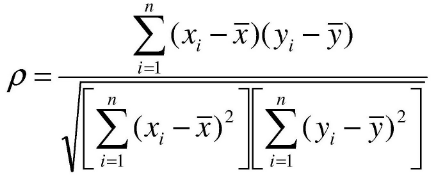

In [152]:
Image(filename = 'imgs/correlacao_pearson.png', width=300, height=300)

In [153]:
def raiz(v):
    return math.sqrt(v)

n = dados['semana'].size
x = dados['semana']
y = dados['vol_vendas']

x_sum = x.sum()
y_sum = y.sum()

x_mean = x.mean()
y_mean = y.mean()

In [154]:
def realizar_correlacao(x, y):
    return sum((x - x_mean) * (y - y_mean)) / raiz( sum(pow(x - x_mean, 2)) * sum( pow(y - y_mean, 2) ))

In [155]:
correlacao = realizar_correlacao(x, y)
correlacao

0.05553235050940941

#### Utilizando a função de pearsonr da SciPy

In [156]:
correlacao_pearson = pearsonr(dados['semana'], dados['vol_vendas'])

coeficiente = correlacao_pearson[0]
valor_p = correlacao_pearson[1]

In [157]:
coeficiente

0.055532350509409426

In [142]:
valor_p

0.878896906536397